<a href="https://colab.research.google.com/github/MiguelGironUNMSM/Python_Quimica/blob/main/E_Qu%C3%ADmico_Miguel_Alejandro_Giron_Altamirano.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Primera propuesta (no logramos imprimir la expresion con corchetes)***

In [1]:
import sympy
print('La ecuación química balanceada tendrá la forma: aA + bB -> cC')
a = sympy.symbols('a')
A = sympy.symbols('A')
b = sympy.symbols('b')
B = sympy.symbols('B')
c = sympy.symbols('c')
C = sympy.symbols('C')

Kc =  C**c / (A**a * B**b)

valor_a = input('Ingresa el valor de a: ')
valor_A = input('Ingresa el valor de A: ')
valor_b = input('Ingresa el valor de b: ')
valor_B = input('Ingresa el valor de B: ')
valor_c = input('Ingresa el valor de c: ')
valor_C = input('Ingresa el valor de C: ')

sustituciones = {a: valor_a, A: valor_A, b: valor_b, B: valor_B, c: valor_c, C: valor_C}
expresion_evaluada = Kc.subs(sustituciones)
print("La expresión del Kc es: ")

sympy.expand(expresion_evaluada)

La ecuación química balanceada tendrá la forma: aA + bB -> cC
Ingresa el valor de a: 2
Ingresa el valor de A: H2
Ingresa el valor de b: 1
Ingresa el valor de B: O2
Ingresa el valor de c: 2
Ingresa el valor de C: H2O
La expresión del Kc es: 


H2O**2/(H2**2*O2)

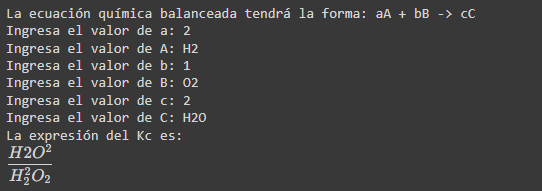

# ***Segunda propuesta (ampliamos el codigo para que acepte más reactivos y/o productos)***

In [2]:
from sympy import symbols, Eq, solve

def obtener_expresion_Kc(ecuacion_balanceada):

    sustancias = set(ecuacion_balanceada.replace('->', '+').replace('+', ' ').split())
    concentraciones = {sustancia: symbols(sustancia) for sustancia in sustancias}
    kc_expresion_numerador = 1
    kc_expresion_denominador = 1
    reactivos, productos = ecuacion_balanceada.split(' -> ')
    reactivos = reactivos.split(' + ')
    productos = productos.split(' + ')

    for sustancia in reactivos:
        kc_expresion_denominador *= concentraciones[sustancia]

    for sustancia in productos:
        kc_expresion_numerador *= concentraciones[sustancia]

    ecuacion_Kc = Eq(kc_expresion_numerador / kc_expresion_denominador, symbols('Kc'))
    expresion_Kc = solve(ecuacion_Kc, symbols('Kc'))[0]
    return expresion_Kc

reaccion_quimica = input("Ingresa la ecuación balanceada de la reacción química: ")
expresion_Kc = obtener_expresion_Kc(reaccion_quimica)

print(f"\nLa expresión de Kc para la reacción {reaccion_quimica} es: Kc = {expresion_Kc}")

Ingresa la ecuación balanceada de la reacción química: 2H2 + O2 -> 2H2O

La expresión de Kc para la reacción 2H2 + O2 -> 2H2O es: Kc = 2H2O/(2H2*O2)


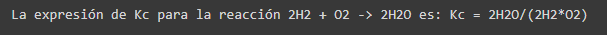

# ***Tercera propuesta (Lo hicimos implementando LaTex para poder visualizarlo con corchetes)***

In [3]:
import sympy as sp
from IPython.display import display, Math

ecuacion_dict = {}
num_reactivos = int(input("Ingrese el número de reactivos: "))
num_productos = int(input("Ingrese el número de productos: "))

for i in range(num_reactivos):
    coef = input("Ingrese el coeficiente para el reactivo %d: " % (i + 1))
    sustancia = input("Ingrese la sustancia para el reactivo %d: " % (i + 1))
    ecuacion_dict[sustancia] = coef

for i in range(num_productos):
    coef = input("Ingrese el coeficiente para el producto %d: " % (i + 1))
    sustancia = input("Ingrese la sustancia para el producto %d: " % (i + 1))
    ecuacion_dict[sustancia] = coef

ecuacion_Kc = []

for sustancia, coef in ecuacion_dict.items():
    if "->" in sustancia:
        continue
    elif "+" in sustancia:
        sustancia = sustancia.replace("+", "")

    sustancia = sp.sympify(sustancia)
    coef = sp.sympify(coef)

    ecuacion_Kc.append("[%s]^%s" % (sustancia, coef))

reactantes = ecuacion_Kc[num_reactivos:]
productos = ecuacion_Kc[:num_reactivos]
latex_Kc = "Kc = \\frac{%s}{%s}" % (" \\cdot ".join(reactantes), " \\cdot ".join(productos))
display(Math(latex_Kc))

Ingrese el número de reactivos: 2
Ingrese el número de productos: 1
Ingrese el coeficiente para el reactivo 1: 2
Ingrese la sustancia para el reactivo 1: H2
Ingrese el coeficiente para el reactivo 2: 1
Ingrese la sustancia para el reactivo 2: O2
Ingrese el coeficiente para el producto 1: 2
Ingrese la sustancia para el producto 1: H2O


<IPython.core.display.Math object>

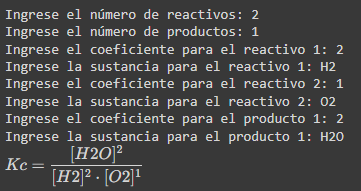